### Execture cells with SHIFT-ENTER

This cell loads the necessary libraries. The logging output of datajoint will disappear in future versions. 

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import datajoint as dj
from pprint import pprint 
dj.config['loglevel'] = 'INFO'
from pipeline import rf, pre, utils
import numpy as np

INFO:root:Setting loglevel to INFO


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Look at possible keys (can be skipped)

This cell can be used to find the key that is to be populated. 

In [15]:
rf.Eye().unpopulated()

DEBUG:datajoint.connection:Executing SQL:SELECT count(*) FROM `pipeline_rf`.`_eye`
DEBUG:datajoint.relational_operand:SELECT `animal_id`,`session`,`scan_idx`,`file_num`,`hd5_path`,`file_base` FROM `pipeline_rf`.`scan` NATURAL JOIN `pipeline_rf`.`session` WHERE ((`animal_id`,`session`,`scan_idx`) not in (SELECT `animal_id`,`session`,`scan_idx` FROM `pipeline_rf`.`_eye`))
DEBUG:datajoint.connection:Executing SQL:SELECT `animal_id`,`session`,`scan_idx`,`file_num`,`hd5_path`,`file_base` FROM `pipeline_rf`.`scan` NATURAL JOIN `pipeline_rf`.`session` WHERE ((`animal_id`,`session`,`scan_idx`) not in (SELECT `animal_id`,`session`,`scan_idx` FROM `pipeline_rf`.`_eye`))
DEBUG:datajoint.relational_operand:SELECT `animal_id`,`session`,`scan_idx` FROM `pipeline_rf`.`scan` NATURAL JOIN `pipeline_rf`.`session` WHERE ((`animal_id`=2054 AND `session`=1 AND `scan_idx`=4) OR (`animal_id`=5269 AND `session`=1 AND `scan_idx`=10) OR (`animal_id`=5269 AND `session`=1 AND `scan_idx`=13) OR (`animal_id`=5269 A

animal_id,session,scan_idx
2054,1,4
5269,1,10
5269,1,13
5269,1,16
5269,1,18
5731,1,2
5731,1,3


### Set the values of key to the desired session 

Change the values of the dictionary to target the desired session and scan. `rf.Eye().new_eye(key)` will load the time stamps and a few frames to select the ROI.

In [11]:
key = dict(animal_id=2054, session=1, scan_idx=2)
eye_time, frames = rf.Eye().new_eye(key)

DEBUG:datajoint.relational_operand:SELECT `animal_id`,`session`,`hd5_path`,`file_base` FROM `pipeline_rf`.`session` WHERE (`session`=1 AND `animal_id`=2054)
DEBUG:datajoint.connection:Executing SQL:SELECT `animal_id`,`session`,`hd5_path`,`file_base` FROM `pipeline_rf`.`session` WHERE (`session`=1 AND `animal_id`=2054)
DEBUG:datajoint.relational_operand:SELECT `animal_id`,`session`,`scan_idx`,`file_num` FROM `pipeline_rf`.`scan` WHERE (`scan_idx`=2 AND `session`=1 AND `animal_id`=2054)
DEBUG:datajoint.connection:Executing SQL:SELECT `animal_id`,`session`,`scan_idx`,`file_num` FROM `pipeline_rf`.`scan` WHERE (`scan_idx`=2 AND `session`=1 AND `animal_id`=2054)
/data/pipeline/python/pipeline/rf.py:54: UserWarning: 8100 timestamps, but 8001  movie frames.
  no_frames=no_frames))


### Execute next cell and draw a rectangle around ROI

This cell selects the region of interest. Draw a rectangle around the entire eye. When done simply execute the next cell below. 

<IPython.core.display.Javascript object>


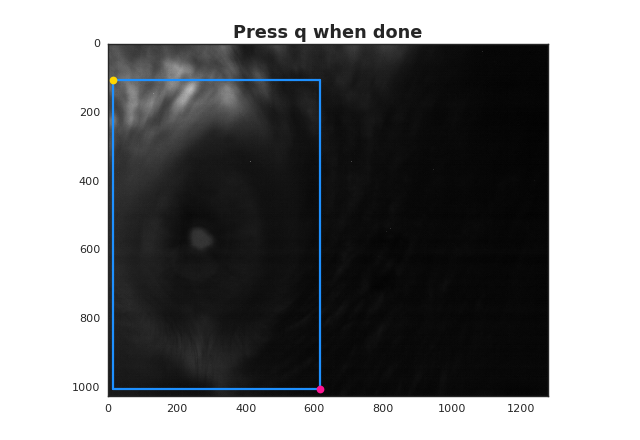

In [13]:
rg = utils.ROIGrabber(frames.mean(axis=2))

### Insert results into database

This cell inserts the timestamps and the ROI into the database. Normally, a tracking minion should then start to track the video.

In [14]:
key['eye_time'] = eye_time
key['eye_roi'] = rg.roi
pprint(key)
rf.Eye().insert1(key)


DEBUG:datajoint.connection:Executing SQL:INSERT INTO `pipeline_rf`.`_eye` (`animal_id`,`session`,`scan_idx`,`eye_roi`,`eye_time`) VALUES (%s,%s,%s,0x5a4c313233003d00000000000000789ccb8dcc6570646480001628cd07a5f9a174268c6682d06f9821340073ad035a,0x5a4c3132330025fa000000000000789c5c7b693cd4edfbf6844429da2411092145b2461c7622c6320c06336366cca26


{'animal_id': 2054,
 'eye_roi': array([  15,  105,  617, 1004]),
 'eye_time': array([  0.00000000e+00,   1.00383600e-01,   2.00172000e-01, ...,
         8.50925747e+02,   8.51012256e+02,   8.51131617e+02]),
 'scan_idx': 2,
 'session': 1}
